In [1]:
import numpy as np
import astropy 
import h5py
from astropy.io import fits
from astrodendro import Dendrogram, pp_catalog
from astropy import units as u
from astrodendro.analysis import PPStatistic

In [2]:
d = Dendrogram.load_from('/home/student04/Newrepos/L1455_dendrogram.fits')

/home/student04/.local/lib/python3.7/site-packages/astrodendro/viewer.py:95: UserWarning: `WCSAxes` package required for wcs coordinate display.
  warnings.warn("`WCSAxes` package required for wcs coordinate display.")


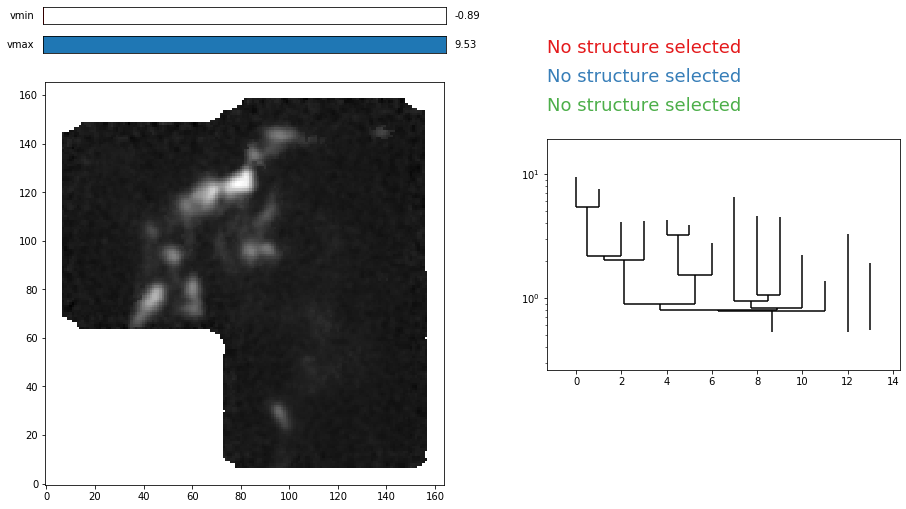

In [3]:
v = d.viewer()

In [4]:
m0 = fits.open('/home/student04/Newrepos/moment0_maps/L1455_NH3_11_all_rebase3_mom0_QA_trim.fits')

In [5]:
m0[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  164                                                  
NAXIS2  =                  166                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                 82.0 / Pixel coordinate of reference point            
CRPIX2  =                 83.0 / Pixel coordinate of reference point            
CDELT1  =  -0.0024440485689343 / [deg] Coordinate increment at reference point  
CDELT2  =   0.0024440485689343 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'        

In [6]:
#Converting the spatial axis and beam size into arcsecs
spatial_axis = (0.0024440485689343*u.deg).to(u.arcsec)
bmaj = (0.008554169991270138*u.deg).to(u.arcsec)
bmin = (0.008554169991270138*u.deg).to(u.arcsec)

In [7]:
metadata={}
metadata['data_unit']= u.Jy
metadata['spatial_scale']= spatial_axis
metadata['beam_major']= bmaj
metadata['beam_minor']= bmin

In [8]:
cat1 = pp_catalog(d,metadata)
cat1.pprint(show_unit=True,max_lines=10)

Computing catalog for 25 structures

[=>                                       ] 4%
[===>                                     ] 8%
[====>                                    ] 12%
[======>                                  ] 16%
[========>                                ] 20%
[=========>                               ] 24%
[===========>                             ] 28%
[============>                            ] 32%
[==============>                          ] 36%
[================>                        ] 40%
[=================>                       ] 44%
[===================>                     ] 48%
[====================>                    ] 52%
[======================>                  ] 56%
[========================>                ] 60%
[=========================>               ] 64%
[===========================>             ] 68%
[============================>            ] 72%
[==============================>          ] 76%
[================================>        ] 80%
[====

# Exploring the Paramters
Plotting histograms and scatterplots for position angle, elongation, area, etc.

# Histograms

In [9]:
position_angle = np.zeros([25])
for i in range(25):
    s = d[i]
    stat = PPStatistic(s,metadata=metadata)
    a = stat.position_angle/(1*u.deg)
    if a<0:
        position_angle[(i)]= a + 180
    else:
        position_angle[(i)]= a

Text(0.5, 1.0, 'L1455:Position Angle(deg)')

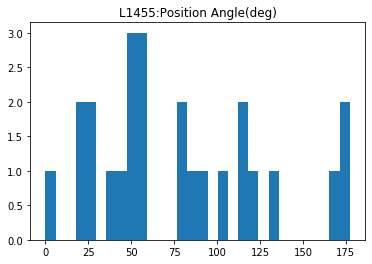

In [11]:
#Plotting histogram of position angle for all structures
from matplotlib import pyplot as plt
plt.hist(position_angle,bins=30)
plt.title('L1455:Position Angle(deg)')

median: 97.57522796947225


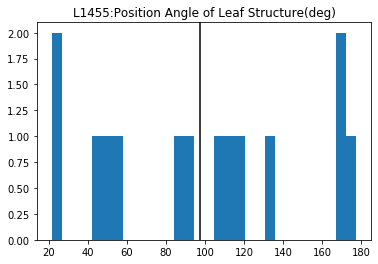

In [12]:
#plotting the histogram of position angle for only leaf structure
angle = []
for i in range(25):
    if d[i].is_leaf:
        s = d[i]
        stat = PPStatistic(s,metadata=metadata)
        a = stat.position_angle/(1*u.deg)
        if a<0:
            angle.append(a+180)
        else:
            angle.append(a)
position_angle_leaf = np.array(angle)
plt.hist(position_angle_leaf,bins=30)
plt.title('L1455:Position Angle of Leaf Structure(deg)')
P_mean = np.mean(position_angle_leaf)
P_median = np.median(position_angle_leaf)
plt.axvline(x = P_median,color='k')
print('median:',P_median)

In [13]:
elongation = []
for i in range(25):
    if d[i].is_leaf:
        s = d[i]
        stat = PPStatistic(s,metadata=metadata)
        elongation.append(stat.major_sigma/stat.minor_sigma)
elongation_leaf = np.array(elongation)
print(elongation_leaf.size)

14


median: 1.7232569899342514


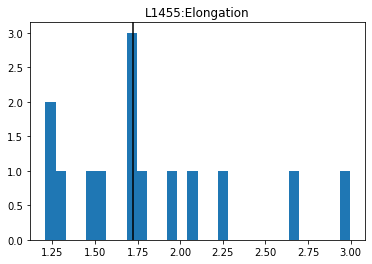

In [14]:
plt.hist(elongation_leaf,bins=30)
plt.title('L1455:Elongation')
E_median = np.median(elongation_leaf)
plt.axvline(x = E_median,color='k')
print('median:',E_median)

# Scatterplots

Text(0.5, 1.0, 'L1455:Position Angle vs Elongation')

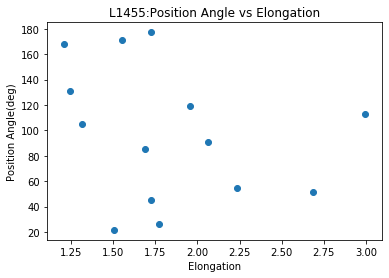

In [15]:
plt.scatter(elongation_leaf,position_angle_leaf)
plt.ylabel('Position Angle(deg)')
plt.xlabel('Elongation')
plt.title('L1455:Position Angle vs Elongation')

In [16]:
area = []
for i in range(25):
    if d[i].is_leaf:
        s = d[i]
        stat = PPStatistic(s,metadata=metadata)
        area.append(stat.area_exact/(u.arcsec)**2)
area_leaf = np.array(area)

Text(0.5, 1.0, 'L1455:Elongation vs Area')

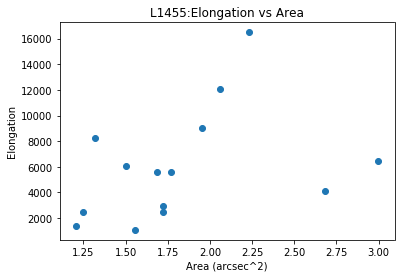

In [17]:
plt.scatter(elongation_leaf,area_leaf)
plt.xlabel('Area (arcsec^2)')
plt.ylabel('Elongation')
plt.title('L1455:Elongation vs Area')

Text(0.5, 1.0, 'L1455:Position Angle vs Area')

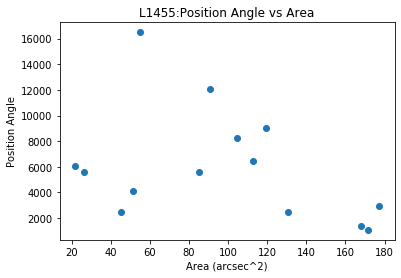

In [18]:
plt.scatter(position_angle_leaf,area_leaf)
plt.xlabel('Area (arcsec^2)')
plt.ylabel('Position Angle')
plt.title('L1455:Position Angle vs Area')

# Contour Line Map 
This map only highlights the identified "leaf structures", or cores.

In [20]:
image = fits.getdata('/home/student04/Newrepos/moment0_maps/L1455_NH3_11_all_rebase3_mom0_QA_trim.fits')
p = d.plotter()

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


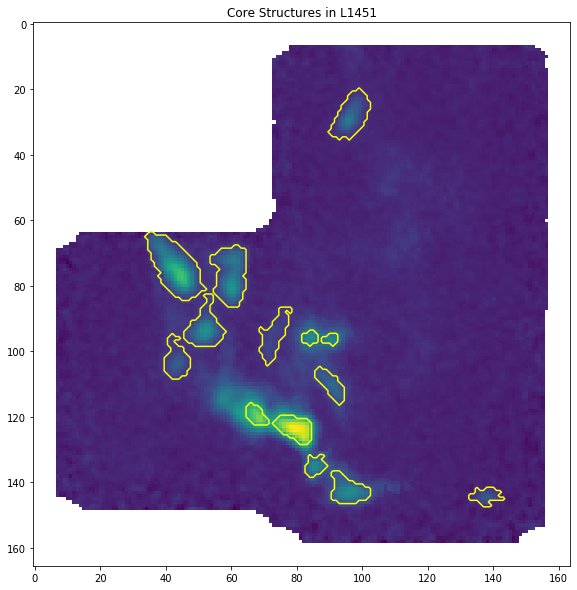

In [21]:
fig = plt.figure(figsize=(10,10))
plt.title('Core Structures in L1451')
ax = fig.add_subplot(1,1,1)
ax.imshow(image)
for i in range(25):
    if d[i].is_leaf:
        p.plot_contour(ax,structure=i,colors='yellow')

# Elongation Threshold
The measurement of position angle is related to the elongation of structures.It is easier to determine the position angle for elongated structures, while more difficult for more rounded structures. Hence, an elongation threshold needs to be set as a reference value.Beyond this value, the position angles measurements become inaccurate and should be treated as outliers in the data. In this project, we adopted the threshold value from Chen et al(2020) and rejected measurements with elongtation < 1.25. 

In [22]:
new_angle = []
new_elongation = []
for i in range(14):
    if elongation_leaf[(i)]>1.25:
        new_angle.append(position_angle_leaf[(i)])
        new_elongation.append(elongation_leaf[(i)])
new_angle_leaf = np.array(new_angle)  
new_elongation_leaf = np.array(new_elongation)
print(new_angle_leaf.size,new_elongation_leaf.size) 

12 12


Text(0.5, 1.0, 'Position Angle vs Elongation')

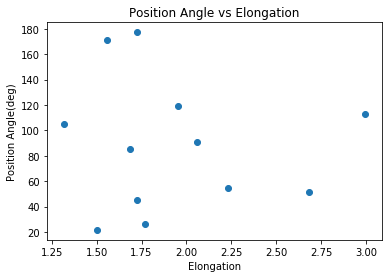

In [23]:
plt.scatter(new_elongation_leaf,new_angle_leaf)
plt.ylabel('Position Angle(deg)')
plt.xlabel('Elongation')
plt.title('Position Angle vs Elongation')